In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import math
import numpy as np

In [2]:
source = 'reproduction_vs_index_Japan.pkl'
with open(source, 'rb') as f:
    raw = pickle.load(f)

data = raw.dropna()  # removes nans

In [7]:
print(data[['Rt', 'GovernmentResponseIndex', 'StringencyIndex', 'ContainmentHealthIndex']].describe().to_latex(float_format="%.2f" ))

\begin{tabular}{lrrrr}
\toprule
{} &     Rt &  GovernmentResponseIndex &  StringencyIndex &  ContainmentHealthIndex \\
\midrule
count & 458.00 &                   458.00 &           458.00 &                  458.00 \\
mean  &   1.10 &                    48.15 &            40.29 &                   42.74 \\
std   &   0.29 &                     5.77 &             7.84 &                    5.52 \\
min   &   0.52 &                    30.21 &            25.93 &                   33.33 \\
25\%   &   0.89 &                    44.27 &            34.26 &                   38.10 \\
50\%   &   1.06 &                    47.40 &            42.59 &                   41.07 \\
75\%   &   1.23 &                    52.81 &            48.15 &                   48.21 \\
max   &   2.30 &                    57.50 &            50.93 &                   51.43 \\
\bottomrule
\end{tabular}



In [18]:
data['GovernmentResponseIndex (log)'] = np.log(data['GovernmentResponseIndex'])
data['StringencyIndex (log)'] = np.log(data['StringencyIndex'])
data['ContainmentHealthIndex (log)'] = np.log(data['ContainmentHealthIndex'])
data['Rt (log)'] = np.log(data['Rt'])



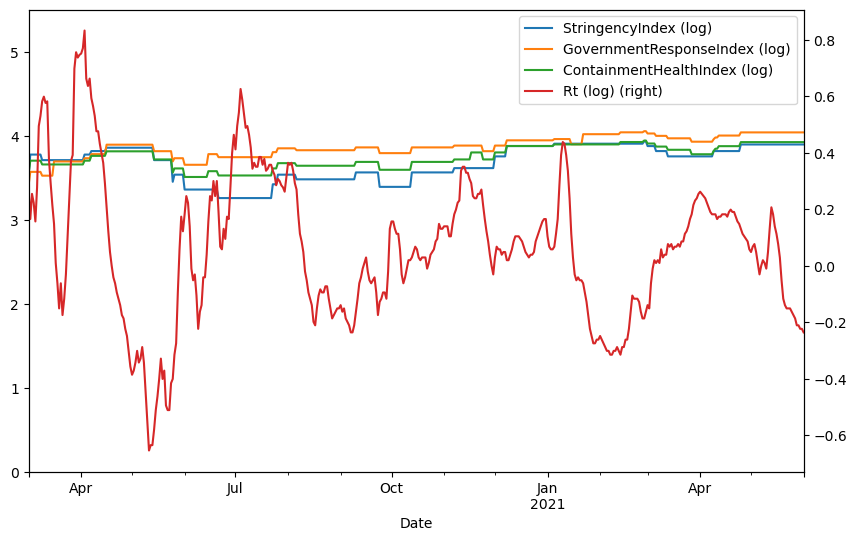

In [22]:
ax = data.plot('Date', y =['StringencyIndex (log)', 'GovernmentResponseIndex (log)', 'ContainmentHealthIndex (log)'], ylim=(0,5.5),figsize=(10,6))
data.plot('Date','Rt (log)',secondary_y=True, ax=ax)
plt.savefig('Figures/indices.pdf',bbox_inches='tight')
plt.show()


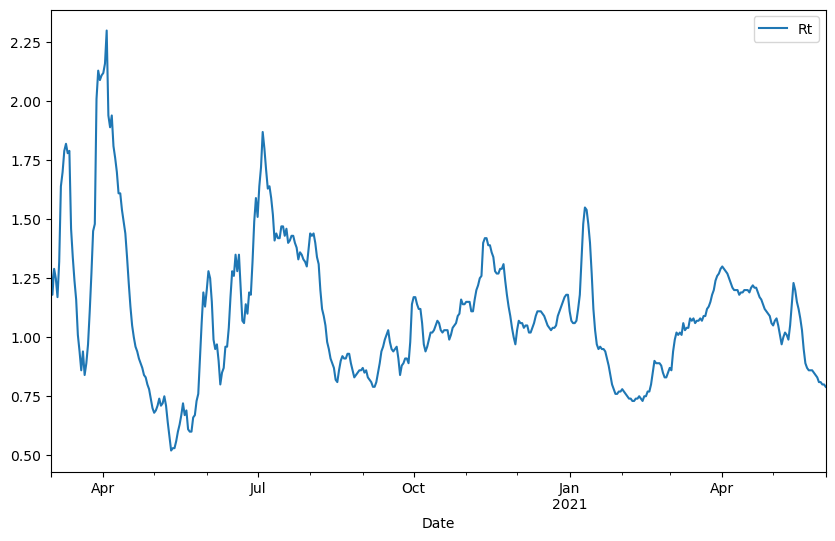

In [27]:
data.plot('Date', 'Rt', figsize=(10,6))
plt.show()

In [51]:
n = len(data)
h = 0.04
print(n, h)

458 0.04


In [52]:
print(h)
print(math.log(n)/(n*h))
print(1/(n*(h*h)))
print(n*(h**7))
print((h**4)*math.log(n))


0.04
0.3344360908359271
1.3646288209606987
7.503872000000002e-08
1.5684785111332315e-05


In [59]:
import numpy as np
y = data['Rt'].values
sigma_sq = y.std()
q75, q25 = np.percentile(y, [75 ,25])
iqr = q75 - q25
res = 1.06 * sigma_sq * (n**-0.2)
print(res)

0.09001974962638765
